In [6]:
from astropy.io import fits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
hdu = fits.open('C:/Users/pilot/Starburst/bpt_diyagramı/bpt_catolog_v2.fits') 

In [8]:
oi_ew = hdu[1].data['OI_EW']
halpha_ew = hdu[1].data['H_alpha_Ew']

oiii_ew = hdu[1].data['OIII_EW']
hbeta_ew = hdu[1].data['H_beta_Ew']

mask = (oi_ew != 0) & (halpha_ew != 0) & (oiii_ew != 0) & (hbeta_ew != 0)

oi_ew = oi_ew[mask]
halpha_ew = halpha_ew[mask]
oiii_ew = oiii_ew[mask]
hbeta_ew = hbeta_ew[mask]

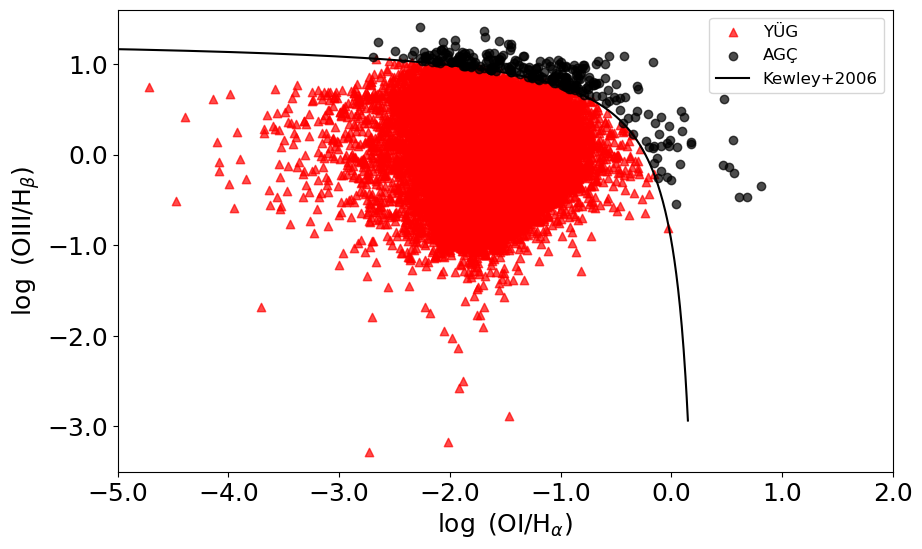

In [10]:
# OI/Ha ve OIII/Hb için verileri çekiyoruz
oi_ew = hdu[1].data['OI_EW']
halpha_ew = hdu[1].data['H_alpha_Ew']
oiii_ew = hdu[1].data['OIII_EW']
hbeta_ew = hdu[1].data['H_beta_Ew']

# Sıfır veya negatif olmayan verileri filtreleme
mask = (oi_ew > 0) & (halpha_ew > 0) & (oiii_ew > 0) & (hbeta_ew > 0)

oi_ew = oi_ew[mask]
halpha_ew = halpha_ew[mask]
oiii_ew = oiii_ew[mask]
hbeta_ew = hbeta_ew[mask]

# Fit fonksiyonunu tanımlıyoruz
def fit_b(x):
    y = (0.72 / (x - 0.32)) + 1.3
    return y

# Logaritmik oranları hesaplıyoruz
oi_ha = np.log10(oi_ew / halpha_ew)
oiii_hb = np.log10(oiii_ew / hbeta_ew)

# Fit çizgisi için daha uygun bir x ekseni aralığı belirleyelim
x_min = oi_ha[~np.isnan(oi_ha)].min()  # Minimum x değeri
x_max = 0.15  # Daha önce kullanılan limit (bunu daha da küçültebiliriz)
x = np.linspace(x_min, x_max, 1000)

# Fit çizgisini sadece bu aralıkta çiziyoruz
y = fit_b(x)

# Fit çizgisini sadece bir kere çiziyoruz
fig1=plt.figure(figsize=(10, 6))
ax =plt.axes()

# Galaksileri starburst ve seyfert olarak ayırıyoruz
starburst_mask = (oiii_hb <= fit_b(oi_ha)) & (oi_ha <= x_max)  # Fit limitine göre starburst galaksiler
seyfert_mask = (oiii_hb > fit_b(oi_ha)) | (oi_ha > x_max)  # Fit limitinin üstünde seyfert galaksiler

# Starburst galaksiler (kırmızı)
plt.scatter(oi_ha[starburst_mask], oiii_hb[starburst_mask], color='r', alpha=0.7, label='YÜG', marker='^')

# Seyfert galaksiler (mavi)
plt.scatter(oi_ha[seyfert_mask], oiii_hb[seyfert_mask], color='black', alpha=0.7, label='AGÇ')

plt.plot(x, y, color='black', linestyle='-', label='Kewley+2006')

# Eksen etiketleri
plt.xlabel(r'$\log$ (OI/H$_{\alpha})$',fontsize=18)
plt.ylabel(r'$\log$ (OIII/H$_{\beta})$',fontsize=18)
plt.tight_layout
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.gcf().set_size_inches(10,6)

# Grafik sınırları
plt.xlim(-5.0,2.0)
plt.ylim(-3.5, 1.6)
#plt.xticks(format='.1f')
ax.xaxis.set_major_formatter("{x:.1f}")
ax.yaxis.set_major_formatter("{x:.1f}")



# Grafik düzenleme
plt.legend(fontsize=12, loc='upper right')
plt.savefig('C:/Desktop/bpt_oiii_hb_and_oi_ha.png', dpi=200)
plt.show(fig1)